In [47]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<h1><center>HOUSES CALIFORNIA REGRESSION</center></h1>

Importar datos
---

Los datos están resguardados en la misma paquetería de Sklearn. Para saber más sobre cómo descargarla, hacer click [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

In [2]:
houses = fetch_california_housing(as_frame = True)
features = houses.data
target = houses.target
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Exploramiento de los datos
---

### Estructura de los DataFrames
1. __features__ : contiene todas las características que se evaluarán en la regresión múltiple.
    - MedInc : Ingreso medio por manzana o bloque.
    - HouseAge : Edad media de casas por manzana o bloque (Antiguedad).
    - AveRooms : número promedio de habitaciones.
    - AveBedrms : número promedio de dormitorios.
    - Population : población por manzana o bloque.
    - AveOccup : promedio de ocupación.
    - Latitude : latitud de la manzana o bloque.
    - Longitude : longitud de la manzana o bloque. 
2. __target__ : Valor medio de una casa para los distrituos de California.

### Dimensiones de los datos

In [3]:
features.shape

(20640, 8)

In [4]:
target.shape

(20640,)

### Tipo de dato por columna

In [5]:
features.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

### Estadísticas generales

In [6]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [7]:
target.describe().T

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

### Valores NaN o Nulos


__features__ no presenta ni valores NaN ni valores nulos.

In [8]:
features.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [9]:
features.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

__target__ no presenta valores NaN ni valores nulos. 

In [10]:
target.isna().sum()

0

In [11]:
target.isnull().sum()

0

### Frecuencia de valores 
En particular, haré énfasis en las columnas Latitude y Longitude. Estás dos características podrían ser bien consideradas como una variable categórica nomial; es decir, el número representa una zona y no tiene un orden. Sin embargo, al momento de calcular cuantas "clasificaciones" podría tener de tratarlas como tal, me dí cuenta que no es buena idea pues son más de 800. Por lo tanto, los valores los dejaré en su estado natural para calcular la regresión.

In [12]:
fea_coun_lati = features.Latitude.value_counts(); fea_coun_lati

34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.63      1
41.88      1
35.89      1
33.27      1
41.61      1
Name: Latitude, Length: 862, dtype: int64

In [13]:
len(fea_coun_lati)

862

In [14]:
fea_coun_long = features.Longitude.value_counts(); fea_coun_long

-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-115.72      1
-123.68      1
-116.09      1
-123.72      1
-116.69      1
Name: Longitude, Length: 844, dtype: int64

In [15]:
len(fea_coun_long)

844

Por practicidad, he decidido calcular qué columnas tienen menos de 50 clasificaciones o datos distintos. Esto con el fin de tomar una decisión entre si dejar mis variables continuas o someterlas a algún tipo de transformación. Como puede verse abajo, no existe alguna columna que cumpla tan característica. Por lo tanto, puedo confiar en que los datos son heterogeneos en cada columna. 

In [16]:
[i for i in features.columns if len(features[i].value_counts()) < 50 ]

[]

Visualización de los datos
---

Dado que los valores de las columnas son flotantes y que tengo una gran variedad de valores en cada columna, una representación de los datos por medio de distribuciones de probabilidad es lo más apropiado para ver sus distribuciones. 

### MedInc 

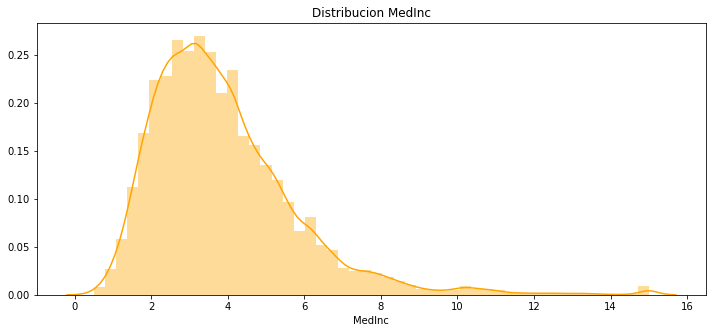

In [17]:
fig, ax = plt.subplots(figsize = [12,5])
plt.title("Distribucion MedInc")
sns.distplot(features.MedInc, color = "orange")

### HouseAge

La distribución para HouseAge se nota con bastante varianza.

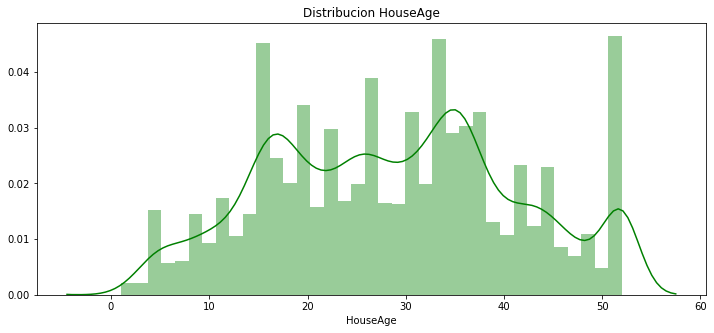

In [18]:
fig, ax = plt.subplots(figsize = [12,5])
plt.title("Distribucion HouseAge")
sns.distplot(features.HouseAge, color = "green")

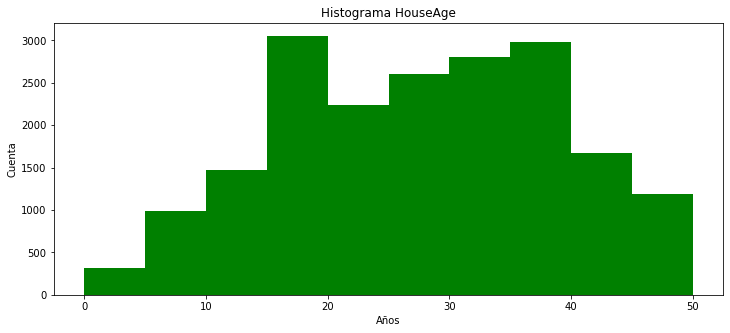

In [19]:
fig, ax = plt.subplots(figsize = [12,5])
plt.hist(features.HouseAge, bins= range(0,52,5), color = "green") #Se hace la división por cada 2 años
plt.title('Histograma HouseAge')
plt.xlabel('Años')
plt.ylabel('Cuenta')
plt.show()

### AveRooms

Es necesario identificar que tantos _outliers_ existen en los datos. Estos pueden afectar el desempeño de la regresión.

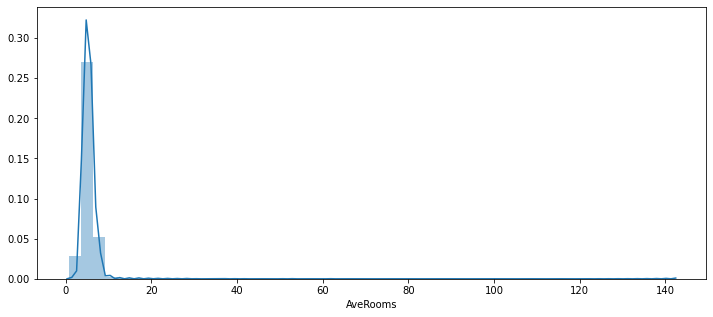

In [20]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(features.AveRooms)

A pesar de que el análisis por medio de _value_counts_ demostró que había gran variedad de valores entre columnas, en este caso, gracias a las representaciones visuales, uno puede darse cuenta de lo despegados que se encuentran de la moda y/o mediana. Existen 2 valores muy extremos, los cuales pueden influir negativamente en la regresión.

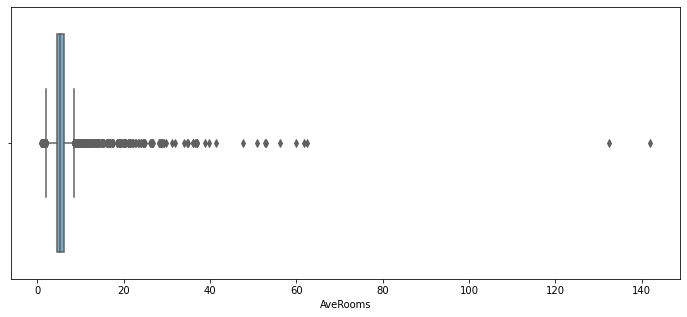

In [21]:
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(data = features,x = "AveRooms", palette = "Blues")

### AveBedrms

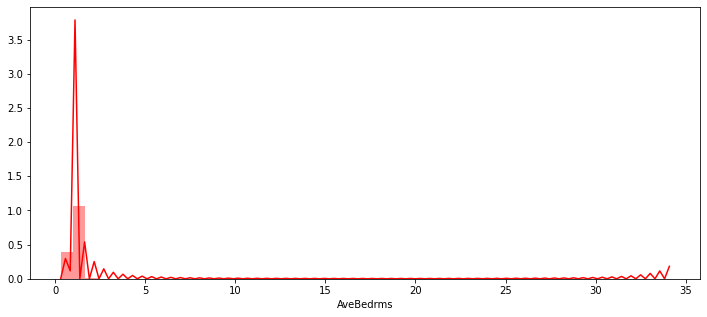

In [22]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(features.AveBedrms, color = "red")

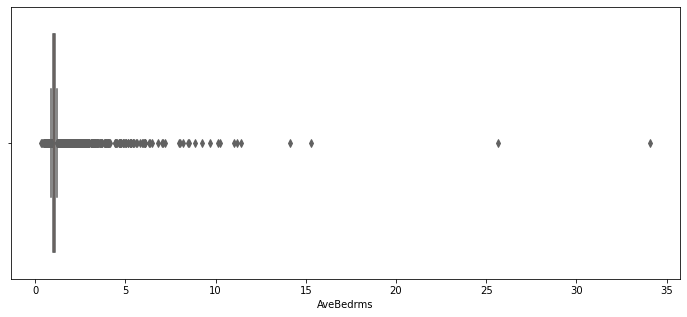

In [23]:
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(data = features,x = "AveBedrms", palette = "Reds")

### Population

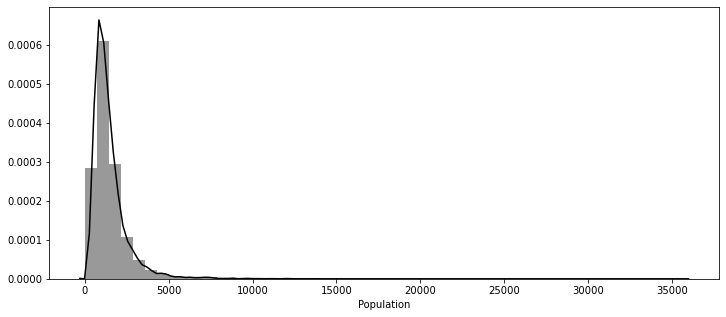

In [24]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(features.Population, color = "black")

### AveOccup

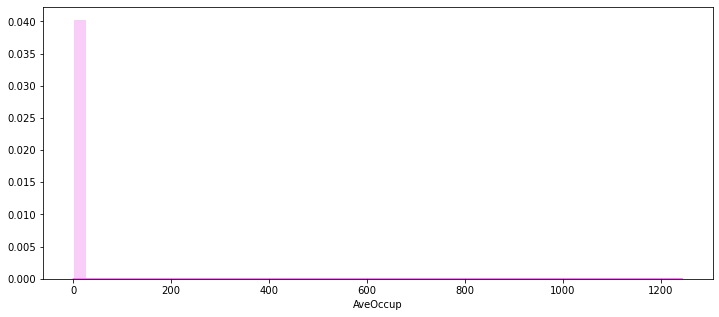

In [25]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(features.AveOccup, color = "violet")

La distribución no es muy descriptiva. Abajo se presenta una _boxplot_ eliminando unos cuantos puntos atípicos extremos.

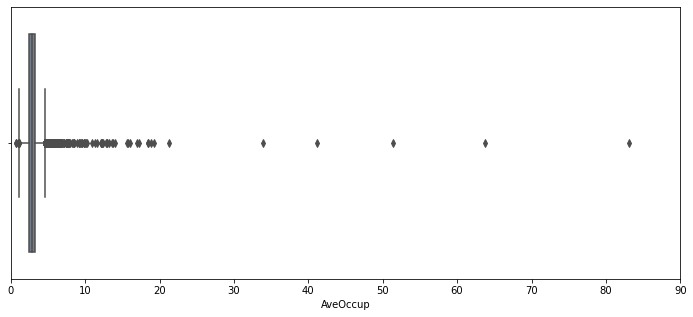

In [26]:
fig, ax = plt.subplots(figsize = [12,5])
ax.set(xlim = (0,90))
sns.boxplot(data = features,x = "AveOccup", palette = "bone")

In [27]:
features.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

### Latitude

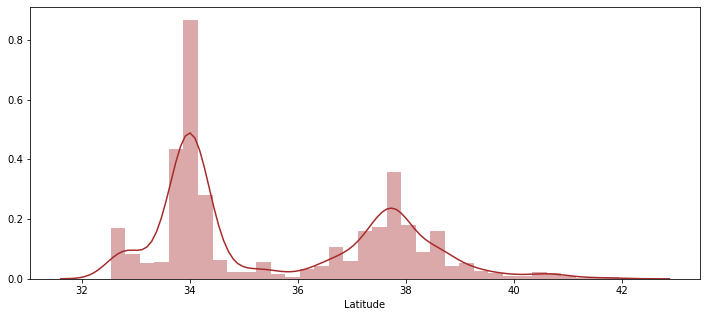

In [28]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(features.Latitude, color = "Brown")

### Longitude

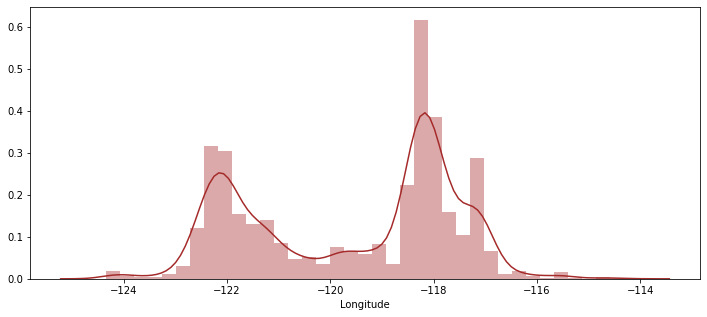

In [29]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(features.Longitude, color = "Brown")

### Relación entre columnas : ¿todas son realmente importantes?

In [30]:
df_pair = pd.concat([features,pd.DataFrame(target)],axis = 1)

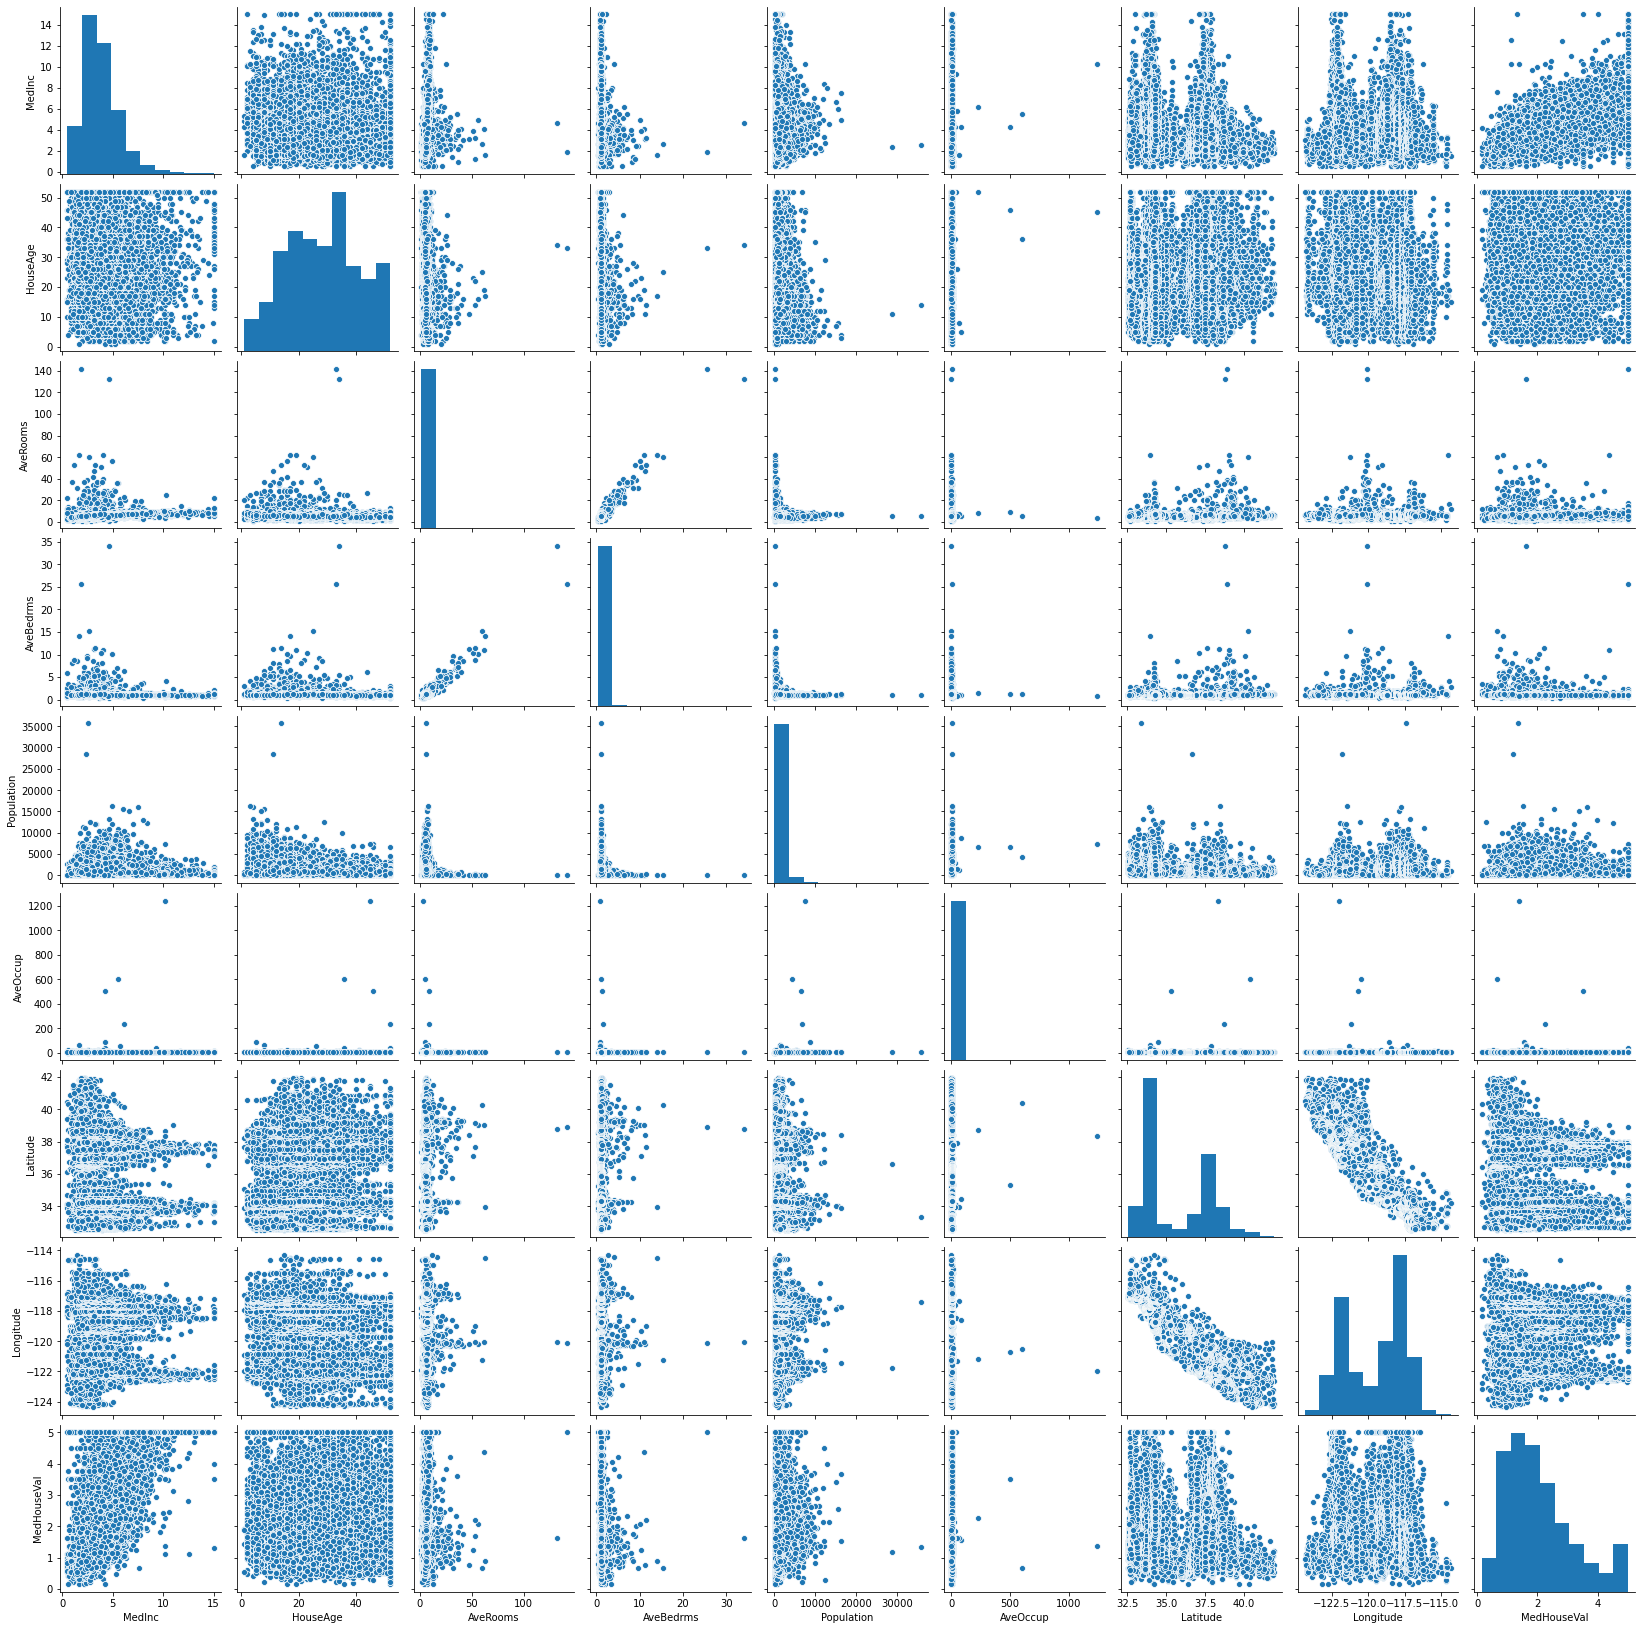

In [31]:
sns.pairplot(df_pair)

Se buscan los _features_ que más relación tengan con MedHouseVal, el target value. Al parecer __MedInc__ es aquella variable con la que comparte un coeficiente de correlación de Pearson de .70, lo cual significa que es la que mejor describiría el valor a predecir. Después sigue __AveRooms__ con .15 y en tercera posición __HouseAge__, con .11. Entre ellas, los coeficientes de correlación son relativamente cercanos. <br>
__¿Será posible que estás 3 características describan de una mejor forma al target value?__

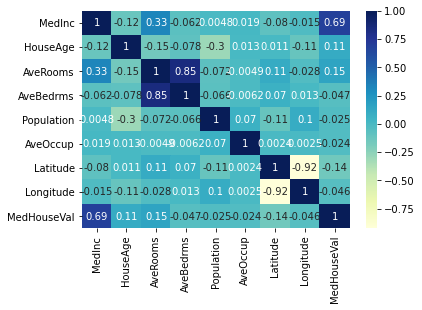

In [32]:
sns.heatmap(df_pair.corr(), annot = True,cmap="YlGnBu")

Separar los datos
---

In [33]:
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target, 
                                                    test_size = .3,
                                                    random_state = 1)

In [34]:
X_train.shape

(14448, 8)

In [35]:
Y_train.shape

(14448,)

In [36]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

### Valores estimados y valores reales.

Se nota una relación lineal entre valores estimados y reales. Aquellos valores 5 son los que más fallan, pudienso ser estos los que mayor número de _outliers_ presentaban.

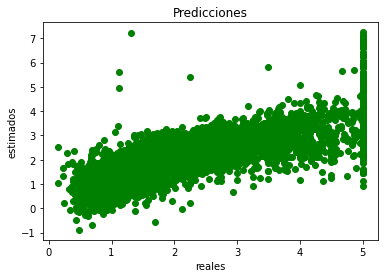

In [37]:
Y_pred = lr.predict(x_test)

plt.scatter(y_test, Y_pred, color = 'green')
plt.title('Predicciones')
plt.xlabel('reales')
plt.ylabel('estimados')
plt.show()

Evaluación
---

### $R^2$

In [52]:
r2 = r2_score(y_test,Y_pred);round(r2,4)

0.5971

### $R^2$ ajustada

In [39]:
n = len(Y_train)
p = X_train.shape[1]
r_cuad_aj = 1 - (((1-r2)*(n-1))/(n-p-1))
r_cuad_aj

0.5969197687903216

### Errores absolutos

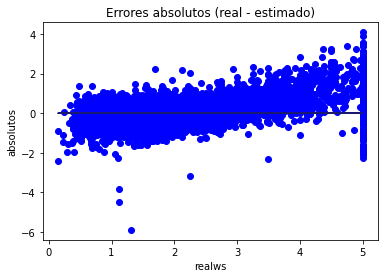

In [40]:
err_abs = y_test-Y_pred

plt.scatter(y_test, err_abs, color = 'blue')
plt.plot(y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('reales')
plt.ylabel('absolutos')
plt.show()

### Errores Relativos

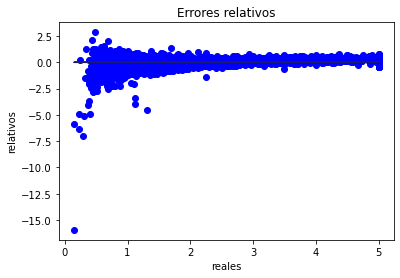

In [41]:
err_rel = err_abs/y_test

plt.scatter(y_test, err_rel, color = 'blue')
plt.plot(y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos')
plt.xlabel('reales')
plt.ylabel('relativos')
plt.show()

### Vaores estimados vs valores reales

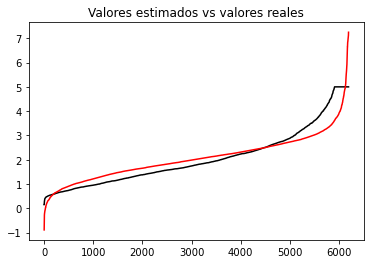

In [43]:
X = range(1,len(y_test)+1)
plt.plot(X, sorted(y_test), color = 'black') #Recta de valores reales
plt.plot(X, sorted(Y_pred), color = 'red') #Recta de valores estimados
plt.title('Valores estimados vs valores reales')
plt.show()

### Error cuadrático

In [44]:
err_cuad = pow(err_abs,2)
err_cuad

4712     2.027823
2151     0.054777
15927    0.173413
82       0.342586
8161     0.335416
           ...   
11387    0.026343
2523     0.271495
18897    0.574833
18878    0.006731
4287     0.023508
Name: MedHouseVal, Length: 6192, dtype: float64

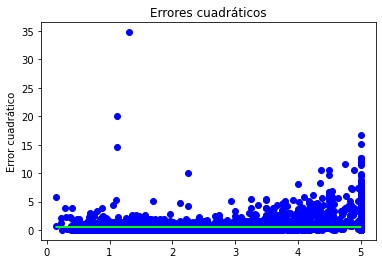

In [51]:
Y = np.repeat(err_cuad_medio, len(err_cuad))
plt.scatter(y_test, err_cuad, color = 'blue')
plt.plot(y_test,Y , color = 'lime') #Recta en Y = err_cuad_medio
plt.title('Errores cuadráticos')
plt.ylabel("Error cuadrático")
plt.show()

### Error Cuadrático Medio

In [48]:
err_cuad_medio = mean_squared_error(y_test, Y_pred)
print("El error cuadrático medio es:",round(err_cuad_medio,2))
print("La raíz cuadrada del error cuadrático medio es: ",round(math.sqrt(err_cuad_medio),2))

El error cuadrático medio es: 0.53
La raíz cuadrada del error cuadrático medio es:  0.73


### Conclusiones

- Según el modelo de regresión lineal ajustado a los datos, la $R^2$ es igual a 0.5971. Esto quiere decir que la regresión lineal logra describir el 60% de la varianza de la variable dependiente respecto de la variable independiente. 
- Existe una correlación lineal media entre las variables _features_ y la _target_. Considerar eliminar los _outliers_ indentificados en un principio podría ayudar a aumentar el desempeño del modelo. 
- Con respecto a las demás métricas de cálculo de errores, se puede notar lo ya descrito arriba.
- Cosideraría utilizar otro modelo de regresión y si se prefiere utilizar este, hace un ajuste de los datos en los cuales se pueda concluir tanta varianza en ellos. Es necesario recalcar que no es una via eliminar aquellos valores que fallan (valores de 5) porque son los valores que más registros se tienen en la columna. De optar por esa vía, se estaría perdiendo demasiada información.

In [77]:
target.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.85000      1
3.93600      1
4.12300      1
4.33000      1
0.47900      1
Name: MedHouseVal, Length: 3842, dtype: int64

¿Qué si se seleccionan los 3 _features_ que mejor se relacionan con la variable _target_?
---

In [55]:
best3 = features[["MedInc","AveRooms", "HouseAge"]] ;best3.head()

,MedInc,AveRooms,HouseAge
0,8.3252,6.984127,41.0
1,8.3014,6.238137,21.0
2,7.2574,8.288136,52.0
3,5.6431,5.817352,52.0
4,3.8462,6.281853,52.0


In [59]:
X_train3, x_test3, Y_train3, y_test3 = train_test_split(best3,
                                                    target, 
                                                    test_size = .3,
                                                    random_state = 2)

In [62]:
lr2 = LinearRegression()
lr2.fit(X_train3,Y_train3)

LinearRegression()

In [78]:
Y_pred3 = lr2.predict(x_test3)
r2_3 = r2_score(Y_pred3,y_test3);r2_3

0.04424602302811542

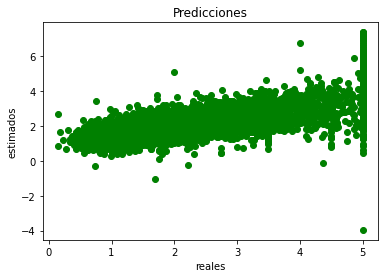

In [72]:
plt.scatter(y_test3, Y_pred3, color = 'green')
plt.title('Predicciones')
plt.xlabel('reales')
plt.ylabel('estimados')
plt.show()

---

In [160]:
sinouts = pd.concat([best3,target],axis = 1)
sinouts = sinouts[sinouts["MedHouseVal"] != 5]; sinouts.head()

,MedInc,AveRooms,HouseAge,MedHouseVal
0,8.3252,6.984127,41.0,4.526
1,8.3014,6.238137,21.0,3.585
2,7.2574,8.288136,52.0,3.521
3,5.6431,5.817352,52.0,3.413
4,3.8462,6.281853,52.0,3.422


In [161]:
X_train_sin, x_test_sin, Y_train_sin, y_test_sin = train_test_split(sinouts.drop(columns = "MedHouseVal"),
                                                    sinouts["MedHouseVal"], 
                                                    test_size = .3, 
                                                    random_state = 10)

In [162]:
lr3 = LinearRegression()
lr3.fit(X_train_sin,Y_train_sin)

LinearRegression()

In [163]:
Y_pred_sin = lr3.predict(x_test_sin)
r2_sin = r2_score(Y_pred_sin,y_test_sin);r2_sin

0.06053770527227009

### Conclusión

- El problema vienen dado por los valores de 5 que son los que menos correctamente se describen por el modelo.